<a href="https://colab.research.google.com/github/simranvanjani/Personal-projects/blob/main/Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS         
import re
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
def transform_text(text):
    text = text.lower()
    
    r = re.findall('@[\w]*', text)
    
    for w in r:
        text = text.replace(w, ' ')
    text = text.replace('[^a-zA-Z#]', '')
    text = ' '.join([word for word in text.split() if len(word) > 3])
    
    text = re.sub(r'\$%,.\:\?', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    words = text.split(" ")
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    text = ' '.join(words) 
    
    return text

In [ ]:
train['clean_text'] = train['tweet'].apply(lambda x : transform_text(x))
train.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause offer wheelcha...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love take time urð±!!! ðððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


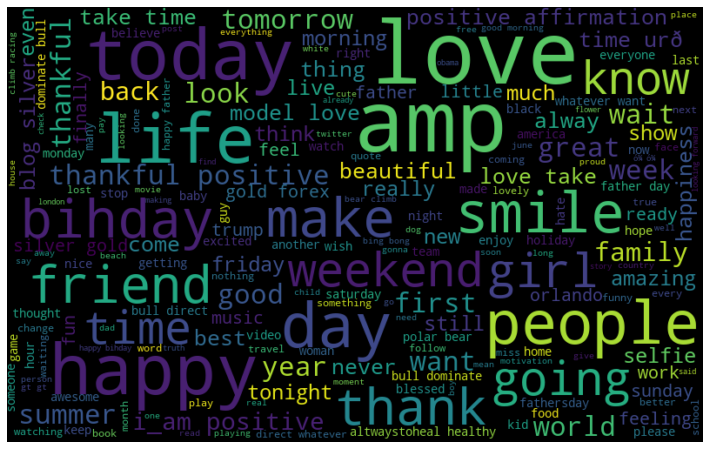

In [ ]:
all_words = " ".join(sent for sent in train['clean_text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pos_words = " ".join(sent for sent in train['clean_text'][train['label'] == 0])



In [ ]:
# Frequency of Negative Words

neg_words = " ".join(sent for sent in train['clean_text'][train['label'] == 1])


In [ ]:
def extract_hashtag(texts):
    hash = []
    
    for text in texts:
        ht = re.findall(r"#(\w+)", text)
        hash.append(ht)
        
    return hash

In [ ]:
hash_pos = extract_hashtag(train['clean_text'][train['label'] == 0])

In [ ]:
hash_neg = extract_hashtag(train['clean_text'][train['label'] == 1])

In [ ]:
hash_neg[:10]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'medâ'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics']]

In [ ]:
hash_pos = sum(hash_pos, [])
hash_neg = sum(hash_neg, [])

In [ ]:
hash_pos[:10]

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate']

In [ ]:
freq = nltk.FreqDist(hash_pos)
pos = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
pos.head()

,Hashtag,Count
0,run,21
1,lyft,1
2,disapointed,1
3,getthanked,2
4,model,247


In [ ]:
freq = nltk.FreqDist(hash_neg)
neg = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
neg.head()

,Hashtag,Count
0,cnn,7
1,michigan,2
2,tcot,8
3,australia,4
4,opkillingbay,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['clean_text'])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(bow, train['label'], random_state=42, test_size=0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
# training
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
# testing
pred = model.predict(xtest)
f1_score(ytest, pred)

0.42023346303501946

In [ ]:
accuracy_score(ytest,pred)

0.9448250324014071

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(xtest)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(ytest, pred)

0.4943089430894309

In [ ]:
accuracy_score(ytest,pred)

0.942418070727643